<a href="https://colab.research.google.com/github/JakeEisner/ECON3916-Statistical-Machine-Learning/blob/main/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install the FRED API library
!pip install fredapi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred

# Authenticate
# Replace the string below with YOUR unique API key from fred.stlouisfed.org
fred = Fred(api_key='df69d2a5b461f1a561f6216223615596')

In [3]:
# 1. Grab the data series
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())

Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-06-01         31.26  321.500
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031


In [5]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (Real Dollars).
    """
    # 1. Get the CPI of the most recent date (Today's Prices)
    # .iloc[-1] grabs the very last row in the data
    cpi_today = cpi_col.iloc[-1]

    # 2. The Formula: (Nominal / Old_CPI) * CPI_Today
    real_col = (nominal_col / cpi_col) * cpi_today

    return real_col

# Apply the function to create a new column
# We feed the "Machine" our two columns:
df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

# Check the result - Notice how Real Wages are different from Nominal!
print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-06-01         31.26  321.500  31.603325
2025-07-01         31.35  322.132  31.632132
2025-08-01         31.45  323.364  31.612130
2025-09-01         31.52  324.368  31.584426
2025-11-01         31.73  325.031  31.730000


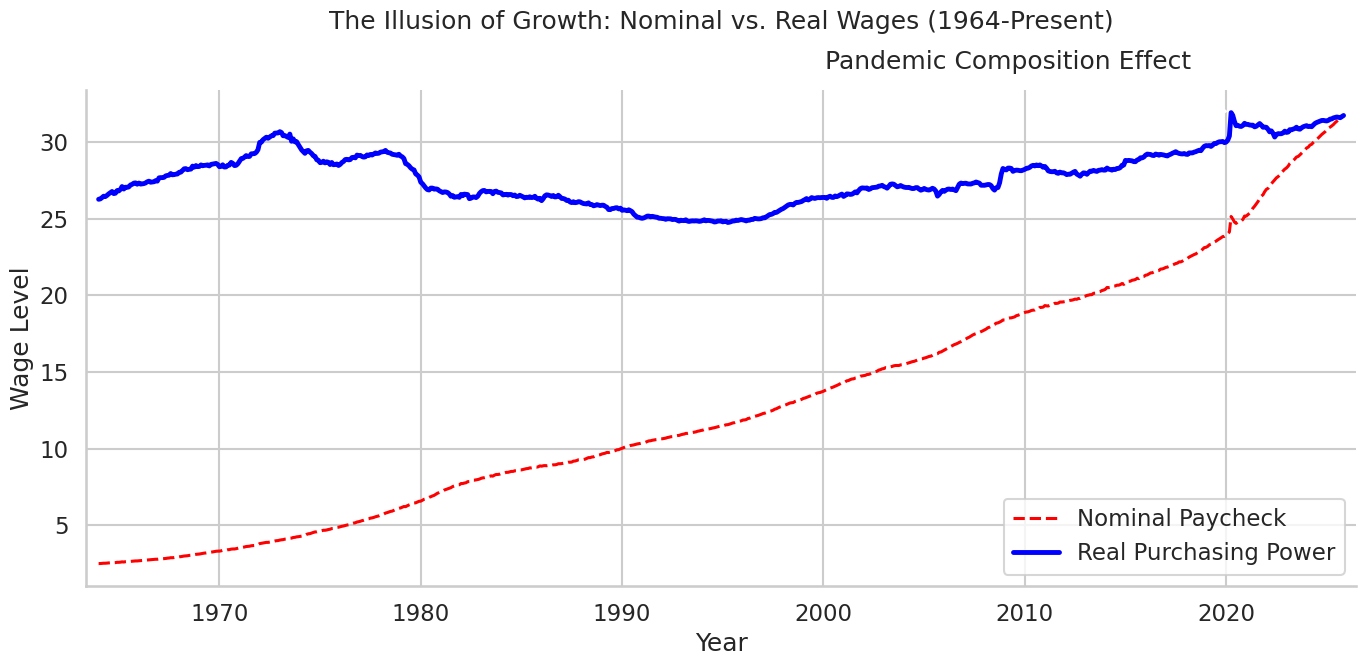

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---- Style ----
sns.set_theme(style="whitegrid", context="talk")

fig, ax = plt.subplots(figsize=(14, 7))

# ---- Lines ----
ax.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    linewidth=2.2,
    color="red",
    label="Nominal Paycheck",
)

ax.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    linewidth=3.5,
    color="blue",
    label="Real Purchasing Power",
)

# ---- Title / Labels ----
ax.set_title("The Illusion of Growth: Nominal vs. Real Wages (1964-Present)", pad= 44)
ax.set_xlabel("Year")
ax.set_ylabel("Wage Level")

# ---- Annotation: 2020 spike in Real Wages ----
# Grab the peak Real_Wage value within calendar year 2020
df_2020 = df.loc["2020"]
spike_date = df_2020["Real_Wage"].idxmax()
spike_val = df_2020["Real_Wage"].max()

ax.annotate(
    "Pandemic Composition Effect",
    xy=(spike_date, spike_val),
    xytext=(spike_date - pd.DateOffset(months=24), spike_val * 1.08),
    arrowprops=dict(arrowstyle="->", linewidth=2),
    ha="right",
    va="bottom",
)

# ---- Finishing touches ----
ax.legend(frameon=True, loc="best")
ax.margins(x=0.01)
sns.despine()
plt.tight_layout()
plt.show()


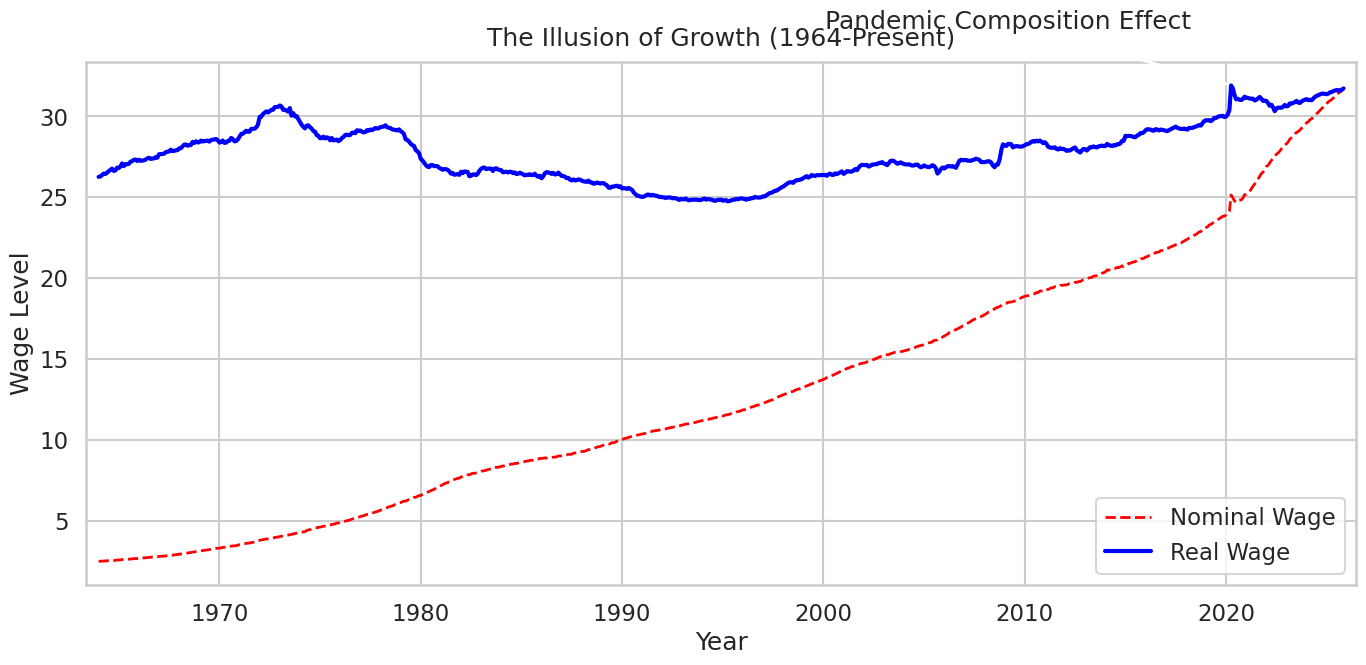

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# ---- Figure ----
fig, ax = plt.subplots(figsize=(14, 7))

# ---- Lines ----
ax.plot(
    df.index,
    df["Nominal_Wage"],
    linestyle="--",
    color="red",
    linewidth=2,
    label="Nominal Wage",
)

ax.plot(
    df.index,
    df["Real_Wage"],
    linestyle="-",
    color="blue",
    linewidth=3,
    label="Real Wage",
)

# ---- Title & Labels ----
ax.set_title("The Illusion of Growth (1964-Present)", pad=12)
ax.set_xlabel("Year")
ax.set_ylabel("Wage Level")

# ---- Annotation: 2020 spike ----
df_2020 = df.loc["2020"]
spike_date = df_2020["Real_Wage"].idxmax()
spike_value = df_2020["Real_Wage"].max()

ax.annotate(
    "Pandemic Composition Effect",
    xy=(spike_date, spike_value),
    xytext=(spike_date - pd.DateOffset(years=2), spike_value * 1.1),
    arrowprops=dict(arrowstyle="->", linewidth=2),
    ha="right",
    va="bottom",
)

# ---- Finishing touches ----
ax.legend()
ax.margins(x=0.01)
plt.tight_layout()
plt.show()


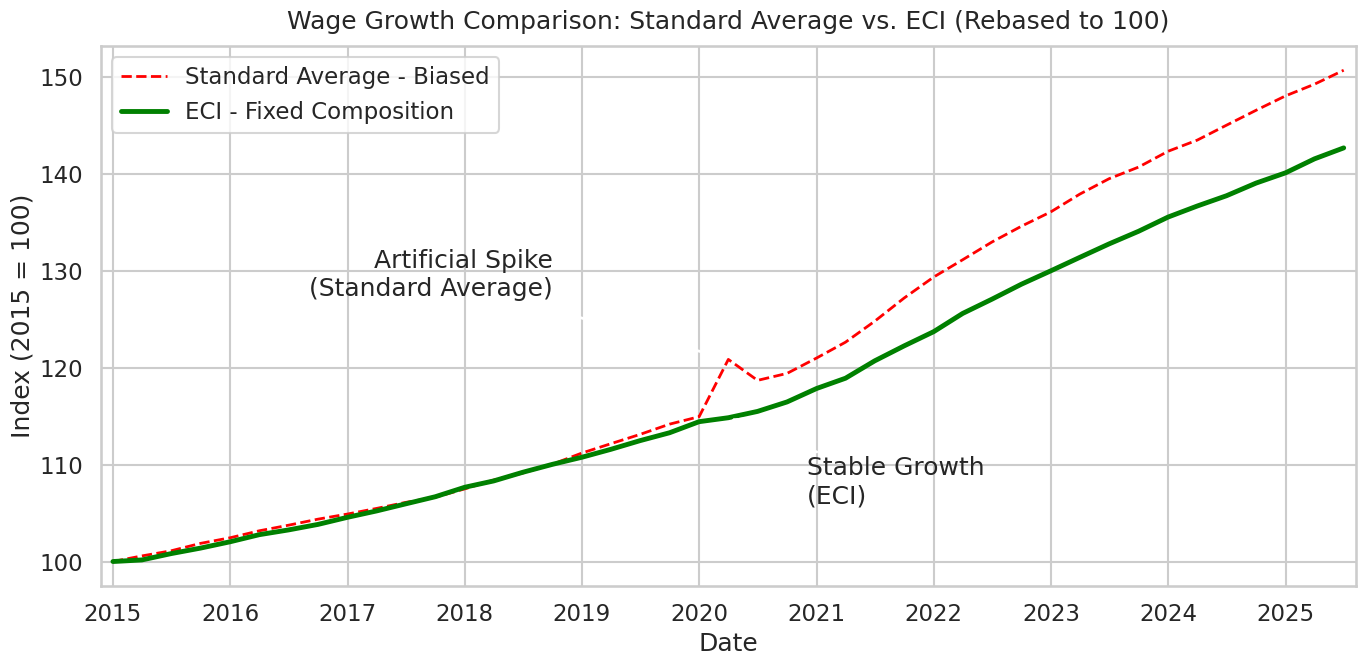

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) Fetch ECI Wage series from FRED (Employment Cost Index: Wages & salaries, private industry workers)
eci = fred.get_series("ECIWAG")
eci.index = pd.to_datetime(eci.index)

# Ensure wages index is datetime (safe even if already is)
wages = wages.copy()
wages.index = pd.to_datetime(wages.index)

# 2) Filter both to 2015-01-01 onwards
start = "2015-01-01"
w = wages.loc[start:].dropna()
e = eci.loc[start:].dropna()

# Align to common dates (keeps apples-to-apples when frequencies differ)
w, e = w.align(e, join="inner")

# 3) Rebase both to 100
w_rebased = (w / w.iloc[0]) * 100
e_rebased = (e / e.iloc[0]) * 100

# 4) Plot
fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(
    w_rebased.index,
    w_rebased,
    linestyle="--",
    color="red",
    linewidth=2,
    label="Standard Average - Biased",
)

ax.plot(
    e_rebased.index,
    e_rebased,
    linestyle="-",
    color="green",
    linewidth=3.5,
    label="ECI - Fixed Composition",
)

ax.set_title("Wage Growth Comparison: Standard Average vs. ECI (Rebased to 100)", pad=12)
ax.set_xlabel("Date")
ax.set_ylabel("Index (2015 = 100)")
ax.legend()

# 5) Annotate divergence in 2020
# Use the largest gap within calendar year 2020 as the divergence point
gap = (w_rebased - e_rebased)
gap_2020 = gap.loc["2020"].dropna()
if not gap_2020.empty:
    diverge_date = gap_2020.idxmax()
    w_y = w_rebased.loc[diverge_date]
    e_y = e_rebased.loc[diverge_date]

    ax.annotate(
        "Artificial Spike\n(Standard Average)",
        xy=(diverge_date, w_y),
        xytext=(diverge_date - pd.DateOffset(months=18), w_y + 6),
        arrowprops=dict(arrowstyle="->", linewidth=2),
        ha="right",
        va="bottom",
    )

    ax.annotate(
        "Stable Growth\n(ECI)",
        xy=(diverge_date, e_y),
        xytext=(diverge_date + pd.DateOffset(months=8), e_y - 4),
        arrowprops=dict(arrowstyle="->", linewidth=2),
        ha="left",
        va="top",
    )

ax.margins(x=0.01)
plt.tight_layout()
plt.show()
